In [1]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

import pandas as pd
import numpy as np
from gensim import corpora, models
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
%matplotlib inline

def ew_mul(a, b):
    return [a*b for (a,b) in zip(a,b)]

/usr/local/lib/python2.7/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")
2016-12-07 17:20:44,925 : INFO : 'pattern' package not found; tag filters are not available for English


In [2]:
skillXproblem = pd.read_csv('./skillXproblem.csv')
print 'CSV file shape:', skillXproblem.shape

skills = skillXproblem.columns.values[1:]
problems = skillXproblem.iloc[:,0]
vectors = skillXproblem.iloc[:,1:].values

unexistent_words = set('photophobia ageing aeroelasticity dataportability'.split())
stoplist = set('and &'.split())

problems = [problem.lower() for problem in problems if problem.lower() not in unexistent_words]
skills = [[word for word in skill.lower().split() if word not in stoplist]
        for skill in skills]

CSV file shape: (96, 12)


In [3]:
word2vec = models.Word2Vec.load_word2vec_format('./word2vec/vectors.bin', binary=True)
word2vec.init_sims(replace=True)

2016-12-07 17:20:45,180 : INFO : loading projection weights from ./word2vec/vectors.bin
2016-12-07 17:21:49,650 : INFO : loaded (3000000, 300) matrix from ./word2vec/vectors.bin
2016-12-07 17:21:49,651 : INFO : precomputing L2-norms of word weight vectors


In [4]:
similarity_vectors = np.asarray([[word2vec.n_similarity(skill, [problem]) for skill in skills] for problem in problems])
problems_vectors = np.asarray([ew_mul(similarity, vector) for similarity, vector in zip(similarity_vectors, vectors)])
#each problem is now represented via a 11d vector
print problems_vectors.shape

(92, 11)


[t-SNE] Computing pairwise distances...
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 92 / 92
[t-SNE] Mean sigma: 0.083379
[t-SNE] Iteration 25: error = 3.2034435, gradient norm = 0.0046849
[t-SNE] Iteration 50: error = 2.9840653, gradient norm = 0.0025243
[t-SNE] Iteration 75: error = 2.6837037, gradient norm = 0.0031539
[t-SNE] Iteration 100: error = 2.5855772, gradient norm = 0.0017914
[t-SNE] KL divergence after 100 iterations with early exaggeration: 2.585577
[t-SNE] Iteration 125: error = 2.4510534, gradient norm = 0.0016189
[t-SNE] Iteration 150: error = 2.4080324, gradient norm = 0.0014375
[t-SNE] Iteration 175: error = 2.3911347, gradient norm = 0.0016631
[t-SNE] Iteration 200: error = 2.3842421, gradient norm = 0.0018331
[t-SNE] Iteration 225: error = 2.3819988, gradient norm = 0.0019069
[t-SNE] Iteration 250: error = 2.3812702, gradient norm = 0.0019306
[t-SNE] Iteration 275: error = 2.3810661, gradient norm = 0.0019374
[t-SN

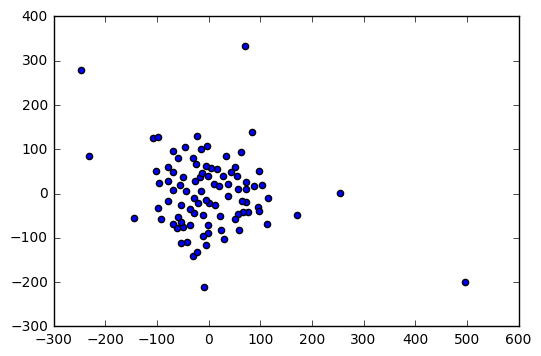

In [29]:
model = TSNE(n_components=2, random_state=0, verbose=2, perplexity=5)
np.set_printoptions(suppress=True)
transform = model.fit_transform(problems_vectors)

X = [point[0] for point in transform]
Y = [point[1] for point in transform]

plt.scatter(X, Y)
plt.show()